<a href="https://colab.research.google.com/github/andreafalcon05-collab/Inteligencia-Artificial/blob/main/Recurrente/Predict_Precio_Bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Componentes de una RNN

Los componentes principales de una red neuronal recurrente (RNN) son similares a los de otras redes neuronales, pero con la característica distintiva de las conexiones recurrentes que les otorgan "memoria" para manejar datos secuenciales.

Los elementos clave incluyen:
* **Capas de Entrada, Oculta y Salida**:

      - **Capa de Entrada**: Recibe la información/datos.
      - **Capa Oculta** (o Celdas Recurrentes): Es el núcleo de la RNN. Procesa la entrada actual y la combina con la activación. Esta activación previa actúa como una forma de memoria de la red.
      - **Capa de Salida**: Genera el resultado o predicción de la red.

* **Conexiones y Pesos**:

      - Las neuronas (nodos) en las diferentes capas están interconectadas.
      - La característica crucial es la retroalimentación (conexiones recurrentes) que permite que la información persista a lo largo del tiempo, fluyendo de un paso de tiempo al siguiente dentro de la misma capa oculta.

* **Función de Activación**:

      Se aplica una función de activación de las entradas en cada neurona para introducir no linealidad en el modelo.

* **Memoria/Estado Oculto**:

      El estado oculto (o activación anterior) es lo que permite a la RNN considerar el contexto de los elementos de la secuencia anteriores, lo cual es fundamental para tareas como el procesamiento del lenguaje natural o el análisis de series temporales.

### Predecir el precio de Bitcoin's

#### Carga de datos

In [ ]:
"""
Leemos el archivo csv desde la URL con pandas
"""
import pandas as pd

_df = pd.read_csv("https://gist.githubusercontent.com/mevangelista-alvarado/6f4f28c00f9e683108637cb3c8d5db89/raw/1ce753283fce23eeab952fa1d660a7069bbe9104/Bitcoin_1_1_2024-6_9_2024_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False)
_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
158,2024-01-03T00:00:00.000Z,2024-01-03T23:59:59.999Z,2024-01-03T09:40:00.000Z,2024-01-03T12:10:00.000Z,2781,44961.603187,45503.241795,40813.534868,42848.175641,4.634232e+10,8.393459e+11,2024-01-03T23:59:59.999Z
157,2024-01-04T00:00:00.000Z,2024-01-04T23:59:59.999Z,2024-01-04T22:22:00.000Z,2024-01-04T01:26:00.000Z,2781,42855.814761,44770.023414,42675.174007,44179.921701,3.044809e+10,8.654825e+11,2024-01-04T23:59:59.999Z
156,2024-01-05T00:00:00.000Z,2024-01-05T23:59:59.999Z,2024-01-05T23:07:00.000Z,2024-01-05T01:49:00.000Z,2781,44192.978699,44353.285859,42784.718266,44162.691630,3.233603e+10,8.651827e+11,2024-01-05T23:59:59.999Z
155,2024-01-06T00:00:00.000Z,2024-01-06T23:59:59.999Z,2024-01-06T00:10:00.000Z,2024-01-06T07:07:00.000Z,2781,44178.954607,44227.631307,43475.156431,43989.194093,1.609250e+10,8.618220e+11,2024-01-06T23:59:59.999Z
154,2024-01-07T00:00:00.000Z,2024-01-07T23:59:59.999Z,2024-01-07T14:09:00.000Z,2024-01-07T23:45:00.000Z,2781,43998.464243,44495.571471,43662.228627,43943.097229,1.933057e+10,8.609518e+11,2024-01-07T23:59:59.999Z


In [ ]:
""""
Obtenesmos un dataframe con las siguientes columnas
"""
_df = _df[['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']]

'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
'low', 'close', 'volume', 'marketCap', 'timestamp'

('low', 'close', 'volume', 'marketCap', 'timestamp')

In [ ]:
"""
Seleccionamos la data que nos interesa
"""
df = _df[['timeOpen', 'open', 'high', 'low', 'close']]

In [ ]:
"""
Covertimos los numpy a array
"""
dates = df[['close']].values

#### Escalar los valores

""" Utilizamos la clase `MinMaxScaler`  para escalar los valores entre 0 y 1 """

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates)

#### Secuencias

""" Se crean secuencias de datos a partir de un conjunto y un tamaño de ventana dado """

In [ ]:
"""
Definimos el tamaño de la ventana de tiempo
"""
window_size = 60
### es el número de puntos de datos que se utilizarán para predecir el siguiente punto de datos en una secuencia ###

""" Crear las secuencias de datos """

In [ ]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)



> *En cada iteración, se crea una secuencia de datos de longitud `window_size` utilizando el índice `i` como punto de partida y se agrega a la lista **sequences**. Además, se agrega la etiqueta correspondiente al siguiente punto de datos después de la secuencia a la lista labels.*




#### Conjunto de entrenamiento y prueba

""" Dividir el conjunto de datos """

In [ ]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

#### Modelo RNNN

> *En este caso particular el modelo está diseñado para procesar secuencias de datos con una RNN simple y luego realizar una predicción utilizando capas conectadas completamente entre si.*



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(SimpleRNN(units=60, return_sequences=False))
model.add(Dense(units=30))
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Entrenamiento y compilación

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1256
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0264
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0105
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069


""" Testing """

In [ ]:
# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


#### Cálculo de métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 815.8242883075487
RMSE: 1092.6581806924805


#### Graficar resultados

""" Predicciónes de la RNN vs Datos del dataset """

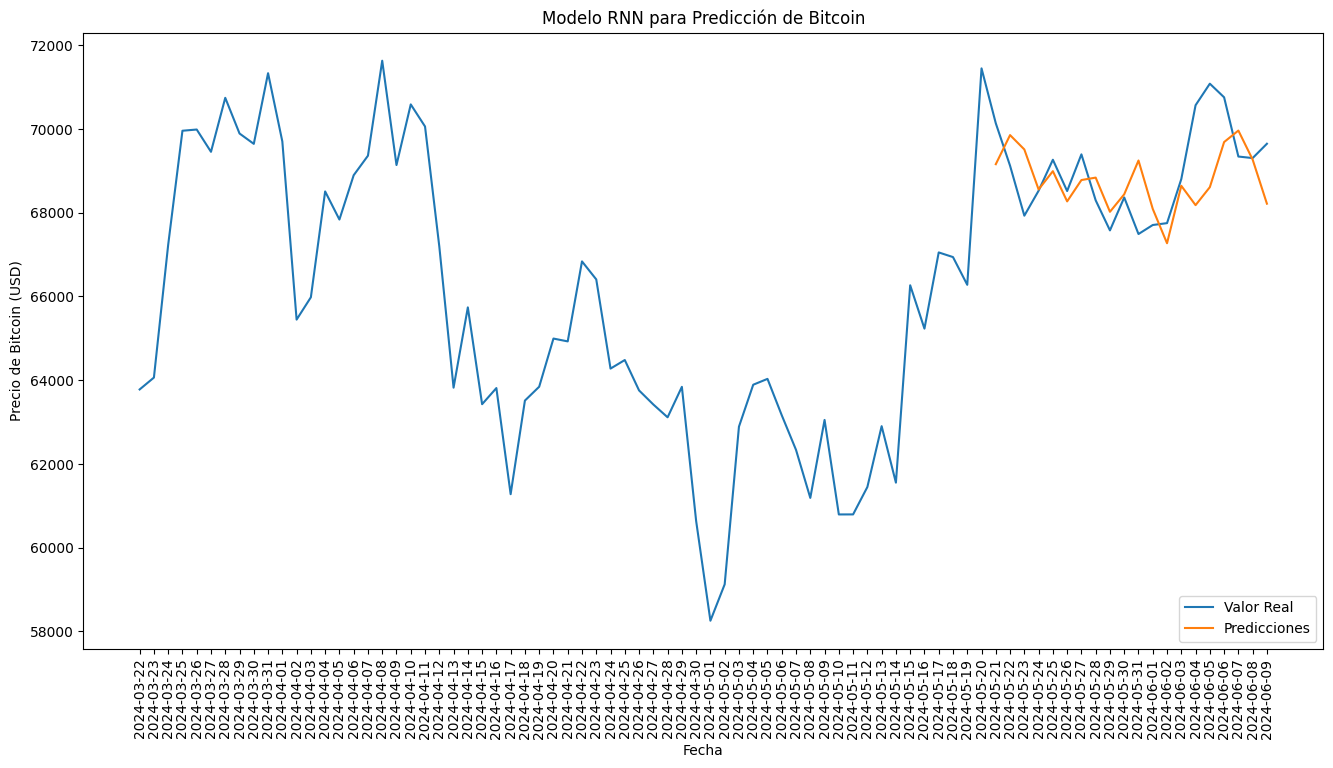

In [ ]:
"""
Grafica los resultados de la predicción que hace la RNN en comparación a los datos de prueba
"""
import matplotlib.pyplot as plt
import numpy as np

valid = df[split:]
# Reiniciar el índice del DataFrame de validación
valid = valid.reset_index(drop=True)
# Inicializar la columna de predicciones con NaN
valid['Predictions'] = np.nan

# Añadir las predicciones al DataFrame de validación desde el punto donde inician las predicciones
valid.loc[window_size:, 'Predictions'] = predictions
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

plt.figure(figsize=(16,8))
plt.title('Modelo RNN para Predicción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

""" Predicción de valores nuevos """

In [ ]:
"""
Generar predicciones del valor de cierre de Bitcoin en los proximos 115 días
"""
# Generar secuencias para los siguientes días
future_sequences = []
# Última secuencia de los valores que tenemos
last_sequence = X[-1]

days = 10
for _ in range(days):
    # Predecir el siguiente valor
    next_value = model.predict(np.array([last_sequence]))[0, 0]

    # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a las secuencias futuras
    future_sequences.append(last_sequence)

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

# Desescalar los datos predichos para los siguientes días
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


In [ ]:
"""
Generar fechas futuras
"""
# Última fecha en los datos reales
last_date = df['timeOpen'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=days)[1:]
future_dates = future_dates.strftime('%Y-%m-%d').tolist()

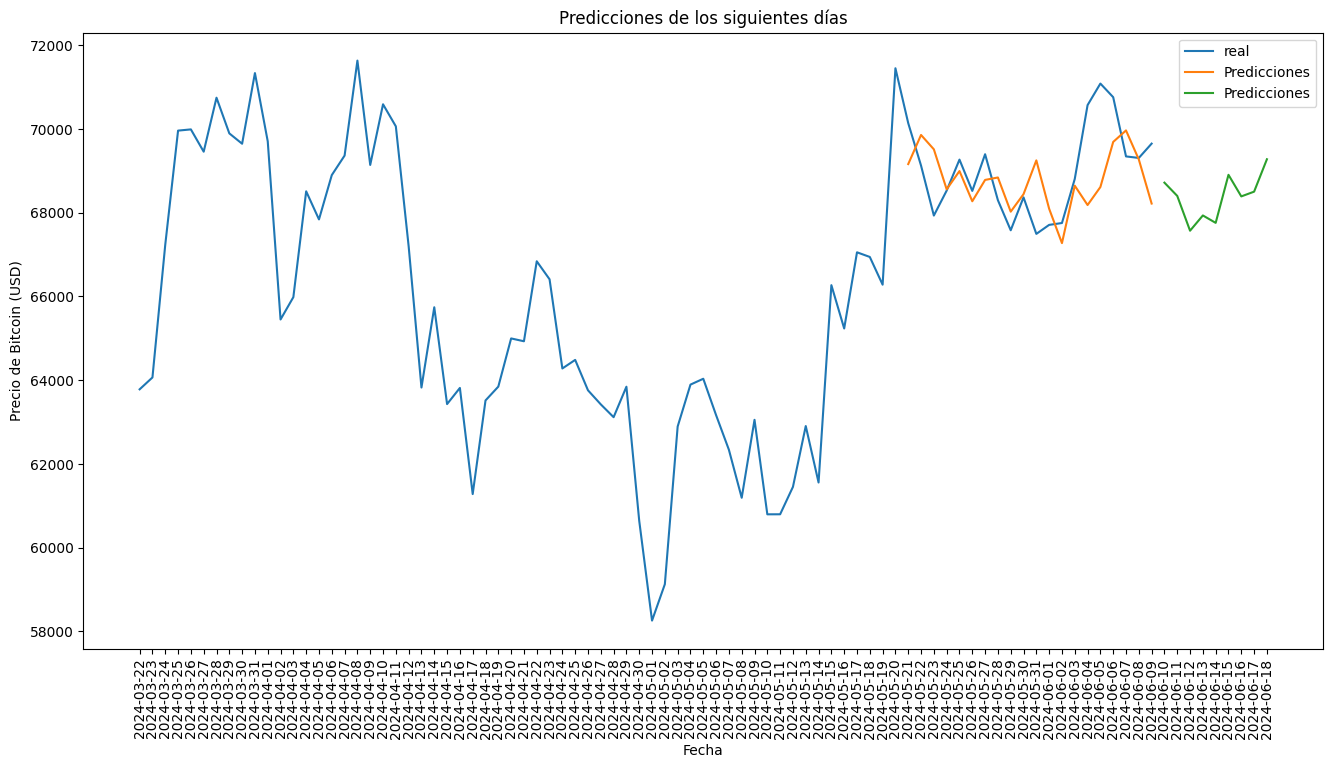

In [ ]:
"""
Graficar los resultados de la predicción de los siguientes días
"""
plt.figure(figsize=(16,8))
plt.title('Predicciones de los siguientes días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones'])
plt.plot(future_dates, future_predictions[:-1], label='Predicciones')
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### Conclusiones



> En conclusión, el ejercicio de crear una RNN para predecir el valor del Bitcoin es una aplicación práctica del aprendizaje automático en el campo de las finanzas y la predicción de series temporales.

> Si el modelo muestra un buen rendimiento en términos de precisión en las predicciones y capacidad para capturar patrones en los datos históricos, puede ser una herramienta valiosa para los inversores y analistas financieros en la toma de decisiones.

> Sin embargo, es importante tener en cuenta que las predicciones de cualquier modelo de este tipo están sujetas a incertidumbres y deben utilizarse con precaución junto con otros análisis y consideraciones.

